In [1]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
import torch
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device:", torch.cuda.get_device_name(0))
else:
    print("No GPU detected.")



CUDA available: True
Device: NVIDIA GeForce RTX 3060 Laptop GPU


In [69]:
import os
import shutil
import random

# Define paths
original_dir = 'raw-img'
base_dir = 'processed-img'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create directories
for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Split data
split_ratios = {'train': 0.7, 'val': 0.1, 'test': 0.2}
classes = os.listdir(original_dir)

for class_name in classes:
    class_dir = os.path.join(original_dir, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)

    train_cutoff = int(split_ratios['train'] * len(images))
    val_cutoff = train_cutoff + int(split_ratios['val'] * len(images))

    splits = {
        'train': images[:train_cutoff],
        'val': images[train_cutoff:val_cutoff],
        'test': images[val_cutoff:]
    }

    for split, image_list in splits.items():
        split_class_dir = os.path.join(base_dir, split, class_name)
        os.makedirs(split_class_dir, exist_ok=True)
        for image in image_list:
            src = os.path.join(class_dir, image)
            dst = os.path.join(split_class_dir, image)
            shutil.copy(src, dst)

print("Data successfully split into train, val, and test sets!")


Data successfully split into train, val, and test sets!


In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

# Define directories for train, val, and test
train_dir = 'processed-img/train'
val_dir = 'processed-img/val'
test_dir = 'processed-img/test'

# Define image transformations without augmentation
basic_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a fixed size
    transforms.ToTensor(),         # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (example: ImageNet normalization)
])

# Load the datasets
train_dataset2 = ImageFolder(root=train_dir, transform=basic_transforms)
val_dataset2 = ImageFolder(root=val_dir, transform=basic_transforms)
test_dataset2 = ImageFolder(root=test_dir, transform=basic_transforms)

# Create DataLoader for batching
train_loader2 = DataLoader(train_dataset2, batch_size=32, shuffle=True)
val_loader2 = DataLoader(val_dataset2, batch_size=32, shuffle=False)
test_loader2 = DataLoader(test_dataset2, batch_size=32, shuffle=False)

# Get class labels
class_labels = train_dataset2.classes  # List of class names (subfolder names)

# Print class labels
print("Class Labels:", class_labels)

# To check if everything works fine, you can print the size of batches and corresponding labels
for images, labels in train_loader2:
    print("Images size:", images.size())  # Images: (batch_size, channels, height, width)
    print("Labels (batch):", labels)  # Labels: (batch_size)
    # Convert numeric labels to class names
    label_names = [class_labels[label] for label in labels]
    print("Label Names (batch):", label_names)  # Corresponding class names
    break  # Print only the first batch


Class Labels: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Images size: torch.Size([32, 3, 224, 224])
Labels (batch): tensor([1, 8, 0, 5, 1, 6, 3, 1, 8, 4, 0, 3, 8, 4, 6, 4, 0, 4, 4, 4, 4, 0, 2, 1,
        2, 3, 2, 4, 1, 4, 3, 2])
Label Names (batch): ['cavallo', 'ragno', 'cane', 'gatto', 'cavallo', 'mucca', 'farfalla', 'cavallo', 'ragno', 'gallina', 'cane', 'farfalla', 'ragno', 'gallina', 'mucca', 'gallina', 'cane', 'gallina', 'gallina', 'gallina', 'gallina', 'cane', 'elefante', 'cavallo', 'elefante', 'farfalla', 'elefante', 'gallina', 'cavallo', 'gallina', 'farfalla', 'elefante']


In [4]:


# Define directories for train, val, and test
train_dir = 'processed-img/train'
val_dir = 'processed-img/val'
test_dir = 'processed-img/test'

# Define image transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=0, translate=None, scale=(0.8, 1.2), shear=None),  # Zoom via scaling
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example for ImageNet normalization
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example for ImageNet normalization
])

# Load the datasets
train_dataset = ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = ImageFolder(root=val_dir, transform=val_test_transforms)
test_dataset = ImageFolder(root=test_dir, transform=val_test_transforms)

# Create DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Get class labels
class_labels = train_dataset.classes  # List of class names (subfolder names)

# Print class labels
print("Class Labels:", class_labels)

# To check if everything works fine, you can print the size of batches and corresponding labels
for images, labels in train_loader:
    print("Images size:", images.size())  # Images: (batch_size, channels, height, width)
    print("Labels (batch):", labels)  # Labels: (batch_size)
    # Convert numeric labels to class names
    label_names = [class_labels[label] for label in labels]
    print("Label Names (batch):", label_names)  # Corresponding class names
    break  # Print only the first batch


Class Labels: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Images size: torch.Size([32, 3, 224, 224])
Labels (batch): tensor([8, 8, 1, 1, 9, 1, 8, 7, 7, 1, 1, 9, 0, 3, 8, 9, 3, 0, 0, 7, 6, 0, 6, 4,
        4, 0, 1, 7, 9, 8, 7, 1])
Label Names (batch): ['ragno', 'ragno', 'cavallo', 'cavallo', 'scoiattolo', 'cavallo', 'ragno', 'pecora', 'pecora', 'cavallo', 'cavallo', 'scoiattolo', 'cane', 'farfalla', 'ragno', 'scoiattolo', 'farfalla', 'cane', 'cane', 'pecora', 'mucca', 'cane', 'mucca', 'gallina', 'gallina', 'cane', 'cavallo', 'pecora', 'scoiattolo', 'ragno', 'pecora', 'cavallo']


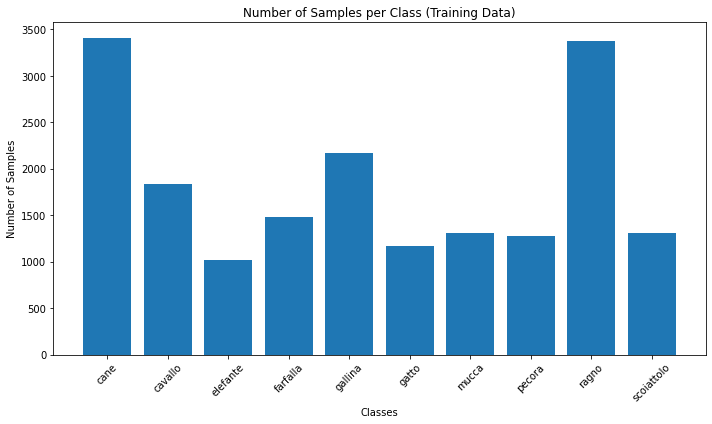

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Compute the number of samples per class in the training set
class_counts = Counter()

for _, labels in train_loader:
    class_counts.update(labels.numpy())  # Update counts for each class label

# Prepare the counts for plotting
train_class_counts = [class_counts[i] for i in range(len(class_labels))]

# Plot the number of samples per class
x = np.arange(len(class_labels))

plt.figure(figsize=(10, 6))
plt.bar(x, train_class_counts)

# Add class labels to the x-axis
plt.xticks(x, class_labels, rotation=45)
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title("Number of Samples per Class (Training Data)")
plt.tight_layout()
plt.show()


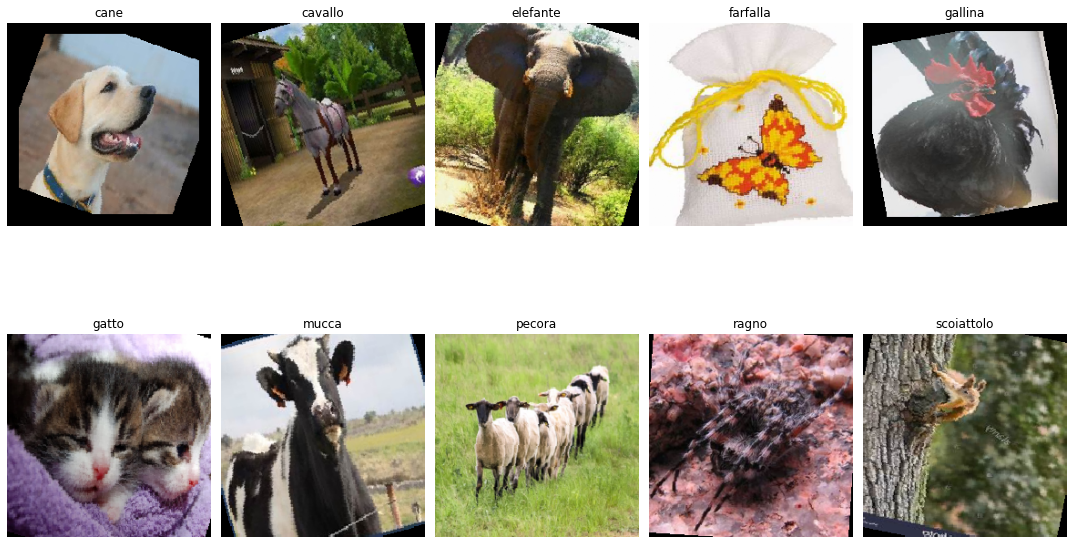

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Get the class names from the dataset
classes = train_dataset.classes

# Create a dictionary to track whether we have already displayed one image per class
displayed_classes = {class_name: False for class_name in classes}

# Initialize a plot for the images
plt.figure(figsize=(15, 10))

# Reverse normalization (if you used ImageNet stats or similar normalization)
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

# Function to unnormalize the image
def unnormalize(img, mean, std):
    # Denormalize the image
    for t, m, s in zip(img, mean, std):
        t.mul_(s).add_(m)
    return img

# Iterate through the batches in the train loader until all classes are covered
for images, labels in train_loader:
    # Iterate through images and labels in the current batch
    for img, label in zip(images, labels):
        class_idx = label.item()  # Get the class index of the current image
        class_name = classes[class_idx]
        
        # If we haven't displayed an image for this class yet
        if not displayed_classes[class_name]:
            # Unnormalize the image and convert from CxHxW to HxWxC for matplotlib
            img = unnormalize(img, mean, std).permute(1, 2, 0).cpu().numpy()  # Convert to HxWxC format

            # Plot the image
            plt.subplot(2, 5, list(displayed_classes.keys()).index(class_name) + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
            displayed_classes[class_name] = True  # Mark the class as displayed

        # Break out of the loop if all classes have been displayed
        if all(displayed_classes.values()):
            break
    if all(displayed_classes.values()):
        break

plt.tight_layout()
plt.show()


In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(32)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(64)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(128)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.bn4 = nn.BatchNorm2d(256)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)
        
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc1 = nn.Linear(256, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool1(x)
        
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.maxpool2(x)
        
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.maxpool3(x)
        
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.maxpool4(x)
        
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = CNNModel(num_classes=10)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Print model summary (similar to Keras model summary)
print(model)

# Print model summary and check parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total Parameters: {total_params}")


CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveA

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


# Define the CNN model
class CNNModel2(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)
        
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc1 = nn.Linear(256, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)
        
        x = F.relu(self.conv2(x))
        x = self.maxpool2(x)
        
        x = F.relu(self.conv3(x))
        x = self.maxpool3(x)
        
        x = F.relu(self.conv4(x))
        x = self.maxpool4(x)
        
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = CNNModel2(num_classes=10)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Print model summary (similar to Keras model summary)
print(model)

# Print model summary and check parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total Parameters: {total_params}")


CNNModel2(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveAvgPool2d(output_size=1)
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)
Total Parameters: 525130


Over_Fit


In [ ]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader

# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 25
num_classes = 10  # Number of classes in your dataset

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset2, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset2, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model = model.to(device)

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Using device: cuda
Epoch [1/25], Loss: 2.1344, Accuracy: 21.85%
Validation Loss: 1.9365, Validation Accuracy: 31.83%
Epoch [2/25], Loss: 1.7537, Accuracy: 38.23%
Validation Loss: 1.6133, Validation Accuracy: 42.31%
Epoch [3/25], Loss: 1.4600, Accuracy: 48.56%
Validation Loss: 1.3477, Validation Accuracy: 51.19%
Epoch [4/25], Loss: 1.2985, Accuracy: 54.39%
Validation Loss: 1.2531, Validation Accuracy: 55.51%
Epoch [5/25], Loss: 1.1671, Accuracy: 59.40%
Validation Loss: 1.1724, Validation Accuracy: 58.65%
Epoch [6/25], Loss: 1.0645, Accuracy: 62.98%
Validation Loss: 1.0765, Validation Accuracy: 62.43%
Epoch [7/25], Loss: 0.9816, Accuracy: 65.97%
Validation Loss: 0.9988, Validation Accuracy: 65.76%
Epoch [8/25], Loss: 0.9067, Accuracy: 68.76%
Validation Loss: 0.9782, Validation Accuracy: 65.80%
Epoch [9/25], Loss: 0.8487, Accuracy: 70.67%
Validation Loss: 0.9321, Validation Accuracy: 67.56%
Epoch [10/25], Loss: 0.7876, Accuracy: 72.75%
Validation Loss: 0.8926, Validation Accuracy: 69.20%


In [18]:
# Save the entire model using pickle
model_save_path = "over_fitted_model.pkl"
with open(model_save_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model pickled and saved to {model_save_path}")

Model pickled and saved to over_fitted_model.pkl


In [47]:
# Load the pickled model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model_save_path = "over_fitted_model.pkl"
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model = loaded_model.to(device)  # Move the model to the appropriate device
print("Model loaded successfully!")

Using device: cuda
Model loaded successfully!


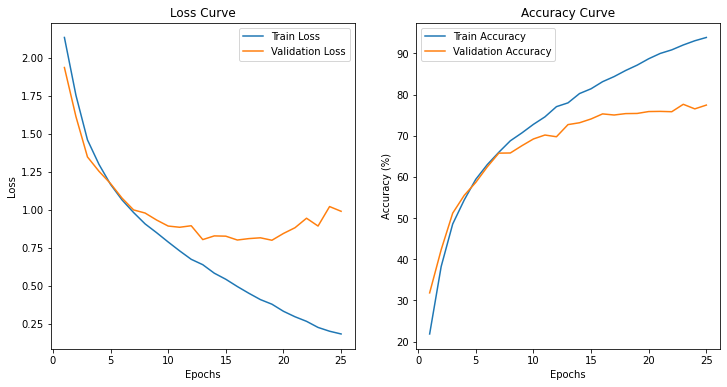

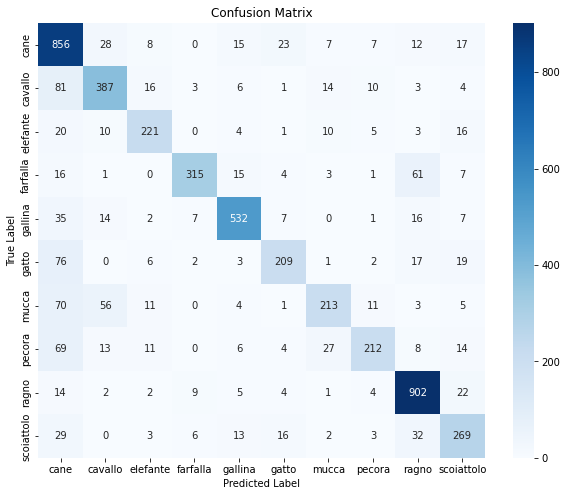

Precision: 0.7928, Recall: 0.7850, F1 Score: 0.7823
Test Accuracy: 78.50%


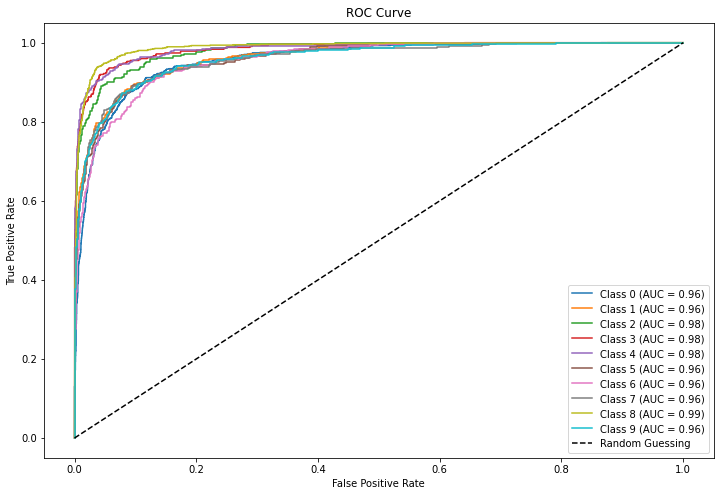

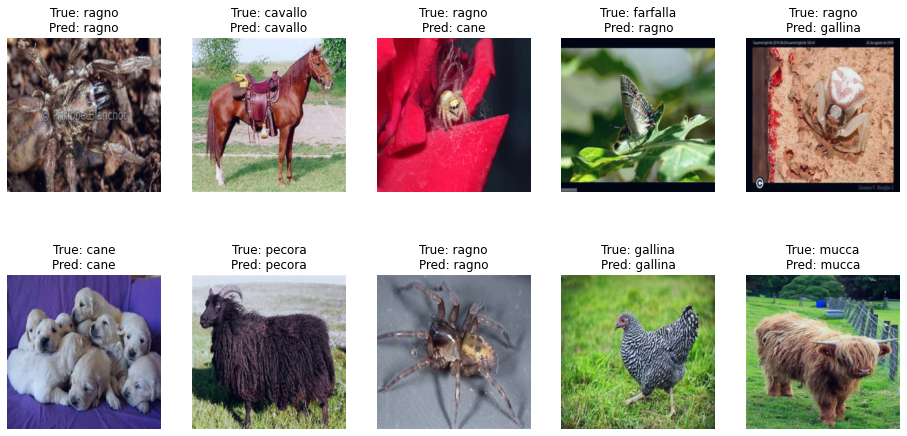

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support
)
from torch.utils.data import DataLoader
import numpy as np
model = loaded_model
# Initialize lists for storing training and validation metrics
train_losses = [
    2.1344, 1.7537, 1.4600, 1.2985, 1.1671, 
    1.0645, 0.9816, 0.9067, 0.8487, 0.7876, 
    0.7288, 0.6735, 0.6382, 0.5822, 0.5421, 
    0.4943, 0.4499, 0.4083, 0.3780, 0.3313, 
    0.2953, 0.2652, 0.2250, 0.2000, 0.1819
]

val_losses = [
    1.9365, 1.6133, 1.3477, 1.2531, 1.1724, 
    1.0765, 0.9988, 0.9782, 0.9321, 0.8926, 
    0.8846, 0.8946, 0.8034, 0.8277, 0.8259, 
    0.8006, 0.8099, 0.8152, 0.7991, 0.8438, 
    0.8815, 0.9441, 0.8926, 1.0209, 0.9898
]

train_accuracies = [
    21.85, 38.23, 48.56, 54.39, 59.40, 
    62.98, 65.97, 68.76, 70.67, 72.75, 
    74.57, 77.05, 77.97, 80.23, 81.39, 
    83.11, 84.35, 85.83, 87.13, 88.68, 
    89.97, 90.84, 92.03, 93.05, 93.85
]

val_accuracies = [
    31.83, 42.31, 51.19, 55.51, 58.65, 
    62.43, 65.76, 65.80, 67.56, 69.20, 
    70.16, 69.74, 72.69, 73.14, 74.06, 
    75.29, 75.02, 75.36, 75.40, 75.86, 
    75.90, 75.82, 77.62, 76.51, 77.43
]

class_names = class_labels

# Test DataLoader
test_loader = DataLoader(test_dataset2, batch_size=32, shuffle=False)

# After training, plot learning curves and evaluate the model
def evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies):
    # Plot learning curves
    epochs_range = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label="Train Loss")
    plt.plot(epochs_range, val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label="Train Accuracy")
    plt.plot(epochs_range, val_accuracies, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy Curve")
    plt.legend()

    plt.show()

# Function to evaluate the model on test data and generate metrics
def evaluate_on_test_data(model, test_loader):
    model.eval()
    y_true, y_pred, y_probs = [], [], []
    correct = 0  # Initialize correct predictions counter
    total = 0  # Initialize total samples counter

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
            y_probs.extend(probabilities.cpu().numpy())

            # Count correct predictions and total samples
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    # Calculate test accuracy
    test_accuracy = 100 * correct / total

    # Generate Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Print classification report
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted"
    )
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1_score:.4f}")
    print(f"Test Accuracy: {test_accuracy:.2f}%")  # Print test accuracy

    # Generate and plot ROC curve for each class
    plt.figure(figsize=(12, 8))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(
            [1 if label == i else 0 for label in y_true],
            [prob[i] for prob in y_probs]
        )
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


import random

# Visualize some random test images with predictions and true labels
def visualize_predictions(model, test_loader, num_images=10):
    model.eval()

    # Collect all images and labels from the test loader
    all_images, all_labels = [], []
    for images, labels in test_loader:
        all_images.append(images)
        all_labels.append(labels)

    # Concatenate all batches into single tensors
    all_images = torch.cat(all_images)
    all_labels = torch.cat(all_labels)

    # Generate random indices for selecting images
    random_indices = random.sample(range(len(all_images)), min(num_images, len(all_images)))

    # Select random images and labels
    selected_images = all_images[random_indices]
    selected_labels = all_labels[random_indices]

    with torch.no_grad():
        outputs = model(selected_images.to(device))
        _, predictions = torch.max(outputs, 1)

    plt.figure(figsize=(16, 8))
    for i, idx in enumerate(random_indices):
        # Convert the tensor image to numpy and rescale pixel values to [0, 1]
        img = selected_images[i].cpu().numpy()
        img = np.transpose(img, (1, 2, 0))  # Convert from [C, H, W] to [H, W, C]
        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]

        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(
            f"True: {class_names[selected_labels[i]]}\nPred: {class_names[predictions[i].cpu()]}"
        )
        plt.axis("off")
    plt.show()


# Call the functions
evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies)
evaluate_on_test_data(model, test_loader)
visualize_predictions(model, test_loader)


Phase 2

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the optimized CNN model
class OptimizedCNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(OptimizedCNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)  # Reduced channels
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)  # Reduced channels
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)  # Reduced channels
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)  # Reduced channels
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)

        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc1 = nn.Linear(128, 256)  # Reduced size
        self.fc2 = nn.Linear(256, num_classes)  # Output layer

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)

        x = F.relu(self.conv2(x))
        x = self.maxpool2(x)

        x = F.relu(self.conv3(x))
        x = self.maxpool3(x)

        x = F.relu(self.conv4(x))
        x = self.maxpool4(x)

        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the optimized model
optimized_model = OptimizedCNNModel(num_classes=10)

# Print the optimized model
print(optimized_model)

# Calculate total trainable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(optimized_model)
print(f"Total Parameters: {total_params}")


OptimizedCNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveAvgPool2d(output_size=1)
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
Total Parameters: 133034


In [24]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader

# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 25
num_classes = 10  # Number of classes in your dataset
model = optimized_model
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset2, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset2, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model = model.to(device)

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Using device: cuda
Epoch [1/25], Loss: 2.0896, Accuracy: 24.06%
Validation Loss: 1.9105, Validation Accuracy: 30.49%
Epoch [2/25], Loss: 1.7630, Accuracy: 37.77%
Validation Loss: 1.6337, Validation Accuracy: 40.78%
Epoch [3/25], Loss: 1.5127, Accuracy: 46.50%
Validation Loss: 1.4231, Validation Accuracy: 48.85%
Epoch [4/25], Loss: 1.3688, Accuracy: 51.69%
Validation Loss: 1.3306, Validation Accuracy: 51.53%
Epoch [5/25], Loss: 1.2896, Accuracy: 55.02%
Validation Loss: 1.3047, Validation Accuracy: 53.56%
Epoch [6/25], Loss: 1.2046, Accuracy: 58.19%
Validation Loss: 1.1961, Validation Accuracy: 57.08%
Epoch [7/25], Loss: 1.1289, Accuracy: 60.71%
Validation Loss: 1.1321, Validation Accuracy: 59.53%
Epoch [8/25], Loss: 1.0645, Accuracy: 62.74%
Validation Loss: 1.1450, Validation Accuracy: 60.41%
Epoch [9/25], Loss: 1.0050, Accuracy: 64.83%
Validation Loss: 1.0591, Validation Accuracy: 62.59%
Epoch [10/25], Loss: 0.9548, Accuracy: 66.70%
Validation Loss: 0.9909, Validation Accuracy: 64.96%


In [25]:
# Continue training the model for 15 more epochs
additional_epochs = 15

for epoch in range(epochs, epochs + additional_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs + additional_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Epoch [26/40], Loss: 0.4465, Accuracy: 84.61%
Validation Loss: 0.8425, Validation Accuracy: 74.22%
Epoch [27/40], Loss: 0.4113, Accuracy: 86.07%
Validation Loss: 0.8515, Validation Accuracy: 74.02%
Epoch [28/40], Loss: 0.3867, Accuracy: 86.71%
Validation Loss: 0.8684, Validation Accuracy: 75.44%
Epoch [29/40], Loss: 0.3684, Accuracy: 87.47%
Validation Loss: 0.9038, Validation Accuracy: 73.68%
Epoch [30/40], Loss: 0.3531, Accuracy: 87.77%
Validation Loss: 0.8514, Validation Accuracy: 74.90%
Epoch [31/40], Loss: 0.3236, Accuracy: 88.92%
Validation Loss: 0.8382, Validation Accuracy: 75.59%
Epoch [32/40], Loss: 0.3007, Accuracy: 89.74%
Validation Loss: 0.8593, Validation Accuracy: 76.43%
Epoch [33/40], Loss: 0.2934, Accuracy: 89.83%
Validation Loss: 0.8903, Validation Accuracy: 75.02%
Epoch [34/40], Loss: 0.2723, Accuracy: 90.69%
Validation Loss: 0.8580, Validation Accuracy: 77.12%
Epoch [35/40], Loss: 0.2377, Accuracy: 91.93%
Validation Loss: 0.9407, Validation Accuracy: 76.59%
Epoch [36/

In [28]:
# Save the entire model using pickle
model_save_path = "over_fitted_model_less_params.pkl"
with open(model_save_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model pickled and saved to {model_save_path}")

Model pickled and saved to over_fitted_model_less_params.pkl


In [29]:
# Load the pickled model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model_save_path = "over_fitted_model_less_params.pkl"
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model = loaded_model.to(device)  # Move the model to the appropriate device
print("Model loaded successfully!")

Using device: cuda
Model loaded successfully!


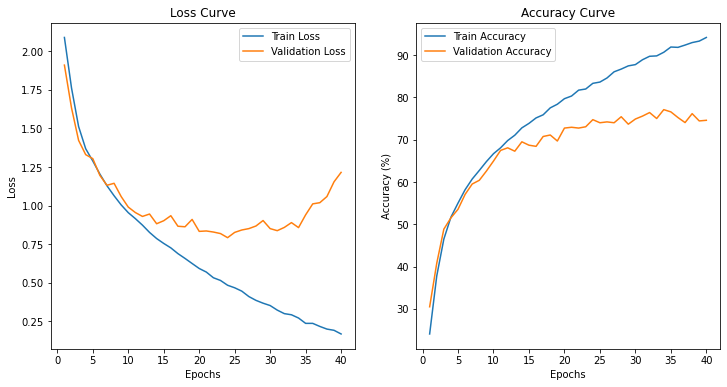

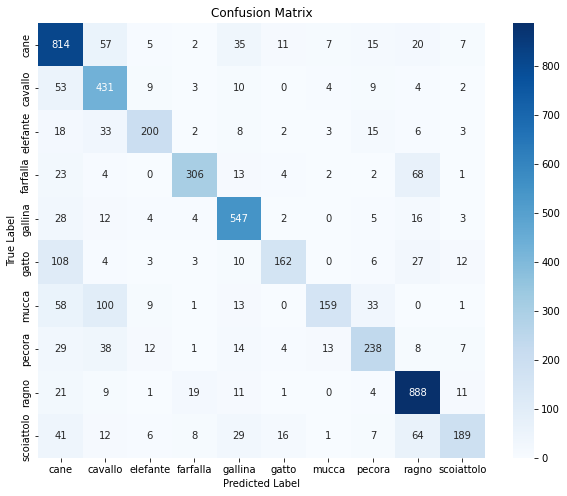

Precision: 0.7635, Recall: 0.7503, F1 Score: 0.7424
Test Accuracy: 75.03%


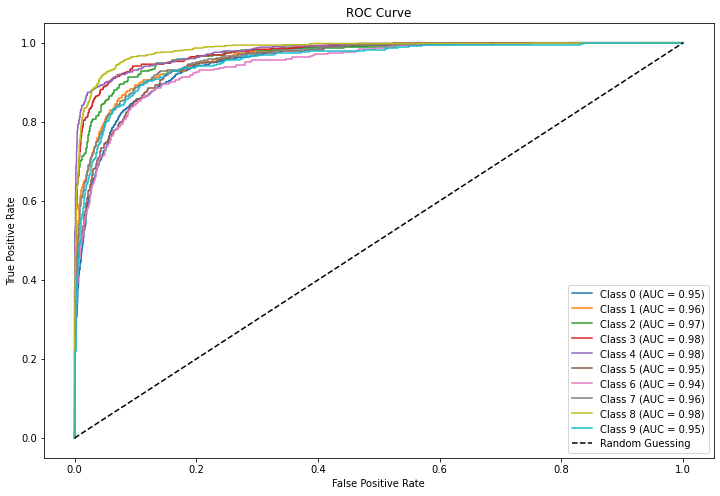

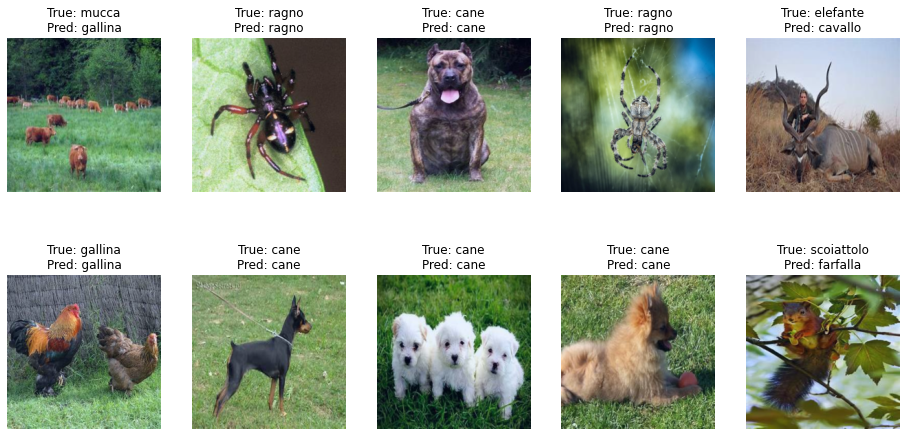

In [30]:
model = loaded_model
# Initialize lists for storing training and validation metrics
train_losses = [
    2.0896, 1.7630, 1.5127, 1.3688, 1.2896, 1.2046, 1.1289, 1.0645, 1.0050, 0.9548,
    0.9161, 0.8740, 0.8268, 0.7871, 0.7554, 0.7267, 0.6895, 0.6583, 0.6255, 0.5932,
    0.5701, 0.5332, 0.5157, 0.4846, 0.4682, 0.4465, 0.4113, 0.3867, 0.3684, 0.3531,
    0.3236, 0.3007, 0.2934, 0.2723, 0.2377, 0.2377, 0.2179, 0.2007, 0.1928, 0.1690
]

val_losses = [
    1.9105, 1.6337, 1.4231, 1.3306, 1.3047, 1.1961, 1.1321, 1.1450, 1.0591, 0.9909,
    0.9556, 0.9304, 0.9459, 0.8830, 0.9026, 0.9351, 0.8668, 0.8634, 0.9110, 0.8336,
    0.8362, 0.8293, 0.8194, 0.7928, 0.8270, 0.8425, 0.8515, 0.8684, 0.9038, 0.8514,
    0.8382, 0.8593, 0.8903, 0.8580, 0.9407, 1.0117, 1.0194, 1.0591, 1.1544, 1.2157
]

train_accuracies = [
    24.06, 37.77, 46.50, 51.69, 55.02, 58.19, 60.71, 62.74, 64.83, 66.70,
    68.09, 69.81, 71.07, 72.81, 73.87, 75.16, 75.90, 77.54, 78.40, 79.71,
    80.34, 81.73, 82.00, 83.34, 83.64, 84.61, 86.07, 86.71, 87.47, 87.77,
    88.92, 89.74, 89.83, 90.69, 91.93, 91.85, 92.39, 92.98, 93.33, 94.19
]

val_accuracies = [
    30.49, 40.78, 48.85, 51.53, 53.56, 57.08, 59.53, 60.41, 62.59, 64.96,
    67.48, 68.09, 67.29, 69.51, 68.71, 68.44, 70.77, 71.12, 69.70, 72.76,
    72.95, 72.76, 73.07, 74.75, 74.02, 74.22, 74.02, 75.44, 73.68, 74.90,
    75.59, 76.43, 75.02, 77.12, 76.59, 75.25, 74.06, 76.17, 74.45, 74.60
]


class_names = class_labels

# Test DataLoader
test_loader = DataLoader(test_dataset2, batch_size=32, shuffle=False)
# Call the functions
evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies)
evaluate_on_test_data(model, test_loader)
visualize_predictions(model, test_loader)

Phase 3

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.batchnorm1 = nn.BatchNorm2d(32)  # Batch normalization after conv1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.batchnorm2 = nn.BatchNorm2d(64)  # Batch normalization after conv2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.batchnorm3 = nn.BatchNorm2d(128)  # Batch normalization after conv3
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.batchnorm4 = nn.BatchNorm2d(256)  # Batch normalization after conv4
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)
        
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc1 = nn.Linear(256, 512)
        self.dropout1 = nn.Dropout(0.5)  # Dropout after first fully connected layer
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.batchnorm1(self.conv1(x)))  # Batch norm before activation
        x = self.maxpool1(x)
        
        x = F.relu(self.batchnorm2(self.conv2(x)))  # Batch norm before activation
        x = self.maxpool2(x)
        
        x = F.relu(self.batchnorm3(self.conv3(x)))  # Batch norm before activation
        x = self.maxpool3(x)
        
        x = F.relu(self.batchnorm4(self.conv4(x)))  # Batch norm before activation
        x = self.maxpool4(x)
        
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout during training
        x = self.fc2(x)
        return x

# Instantiate the model
model = CNNModel(num_classes=10)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Print model summary (similar to Keras model summary)
print(model)

# Print model summary and check parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total Parameters: {total_params}")


CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import Dataset

torch.cuda.empty_cache()
del model

# Hyperparameters
learning_rate = 0.002
batch_size = 32
epochs = 25
num_classes = 10  # Number of classes in your dataset
model = optimized_model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)  # L2 Regularization (weight decay)

# Learning Rate Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# # Data Augmentation (train data only)
# train_transforms = transforms.Compose([
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(10),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
#     transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
#     transforms.ToTensor(),
# ])

# # For validation, just normalization (no augmentation)
# val_transforms = transforms.Compose([
#     transforms.ToTensor(),
# ])

# # Apply transformations to the datasets
# train_dataset2_transformed = train_dataset2  # Apply transform to your dataset here
# val_dataset2_transformed = val_dataset2  # Apply transform to your dataset here

# # Assuming you have a custom dataset class that allows the use of transforms
# train_dataset2_transformed.transform = train_transforms
# val_dataset2_transformed.transform = val_transforms

# DataLoaders for training and validation datasets with transformations
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model = model.to(device)

# Early stopping variables
best_val_loss = float('inf')
patience = 5
trigger_times = 0

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0  # Reset the counter when the validation loss improves
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered!")
            break

    # Step the scheduler (adjust learning rate)
    scheduler.step(val_loss)


Using device: cuda
Epoch [1/25], Loss: 0.6704, Accuracy: 77.14%
Validation Loss: 0.7603, Validation Accuracy: 75.71%
Epoch [2/25], Loss: 0.6428, Accuracy: 78.46%
Validation Loss: 0.7274, Validation Accuracy: 76.17%
Epoch [3/25], Loss: 0.6212, Accuracy: 79.15%
Validation Loss: 0.7494, Validation Accuracy: 75.06%
Epoch [4/25], Loss: 0.6147, Accuracy: 79.55%
Validation Loss: 0.7839, Validation Accuracy: 74.37%
Epoch [5/25], Loss: 0.6045, Accuracy: 79.52%
Validation Loss: 0.7050, Validation Accuracy: 77.31%
Epoch [6/25], Loss: 0.5956, Accuracy: 79.89%
Validation Loss: 0.6849, Validation Accuracy: 77.16%
Epoch [7/25], Loss: 0.5857, Accuracy: 80.41%
Validation Loss: 0.6766, Validation Accuracy: 77.39%
Epoch [8/25], Loss: 0.5763, Accuracy: 80.77%
Validation Loss: 0.6934, Validation Accuracy: 77.58%
Epoch [9/25], Loss: 0.5675, Accuracy: 81.01%
Validation Loss: 0.6989, Validation Accuracy: 76.59%
Epoch [10/25], Loss: 0.5682, Accuracy: 80.64%
Validation Loss: 0.7259, Validation Accuracy: 76.82%


In [40]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader

# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 25
num_classes = 10  # Number of classes in your dataset

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model = model.to(device)

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Using device: cuda
Epoch [1/25], Loss: 1.8797, Accuracy: 33.50%
Validation Loss: 1.6668, Validation Accuracy: 41.43%
Epoch [2/25], Loss: 1.6027, Accuracy: 43.77%
Validation Loss: 1.5604, Validation Accuracy: 44.53%
Epoch [3/25], Loss: 1.4549, Accuracy: 49.18%
Validation Loss: 1.5633, Validation Accuracy: 46.86%
Epoch [4/25], Loss: 1.3499, Accuracy: 52.46%
Validation Loss: 1.4254, Validation Accuracy: 50.61%
Epoch [5/25], Loss: 1.2870, Accuracy: 55.03%
Validation Loss: 1.2266, Validation Accuracy: 57.73%
Epoch [6/25], Loss: 1.2214, Accuracy: 57.25%
Validation Loss: 1.0851, Validation Accuracy: 62.62%
Epoch [7/25], Loss: 1.1760, Accuracy: 59.45%
Validation Loss: 1.0824, Validation Accuracy: 61.29%
Epoch [8/25], Loss: 1.1289, Accuracy: 61.12%
Validation Loss: 1.1398, Validation Accuracy: 59.49%
Epoch [9/25], Loss: 1.0931, Accuracy: 62.41%
Validation Loss: 1.0484, Validation Accuracy: 63.39%
Epoch [10/25], Loss: 1.0660, Accuracy: 63.31%
Validation Loss: 1.1100, Validation Accuracy: 60.21%


In [38]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader


# torch.cuda.empty_cache()
# del model

model = CNNModel(num_classes=10)
# Hyperparameters
learning_rate = 0.005
batch_size = 64
epochs = 40
num_classes = 10  # Number of classes in your dataset

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model = model.to(device)

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Using device: cuda
Epoch [1/40], Loss: 2.0358, Accuracy: 27.16%
Validation Loss: 1.8617, Validation Accuracy: 35.50%
Epoch [2/40], Loss: 1.8447, Accuracy: 35.91%
Validation Loss: 1.7670, Validation Accuracy: 36.57%
Epoch [3/40], Loss: 1.6973, Accuracy: 40.83%
Validation Loss: 1.5121, Validation Accuracy: 46.44%
Epoch [4/40], Loss: 1.5324, Accuracy: 46.51%
Validation Loss: 1.4064, Validation Accuracy: 50.42%
Epoch [5/40], Loss: 1.4040, Accuracy: 51.55%
Validation Loss: 1.3755, Validation Accuracy: 50.84%
Epoch [6/40], Loss: 1.3136, Accuracy: 54.53%
Validation Loss: 1.3434, Validation Accuracy: 53.44%
Epoch [7/40], Loss: 1.2383, Accuracy: 57.37%
Validation Loss: 1.1597, Validation Accuracy: 59.22%
Epoch [8/40], Loss: 1.1773, Accuracy: 59.74%
Validation Loss: 1.1052, Validation Accuracy: 61.48%
Epoch [9/40], Loss: 1.1106, Accuracy: 62.42%
Validation Loss: 1.0605, Validation Accuracy: 62.09%
Epoch [10/40], Loss: 1.0776, Accuracy: 63.40%
Validation Loss: 1.0902, Validation Accuracy: 61.94%


In [39]:
# Save the entire model using pickle
model_save_path = "fit_model_of_phase1.pkl"
with open(model_save_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model pickled and saved to {model_save_path}")

Model pickled and saved to fit_model_of_phase1.pkl


In [49]:
# Load the pickled model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model_save_path = "fit_model_of_phase1.pkl"
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model = loaded_model.to(device)  # Move the model to the appropriate device
print("Model loaded successfully!")
# print(loaded_model)

Using device: cuda
Model loaded successfully!


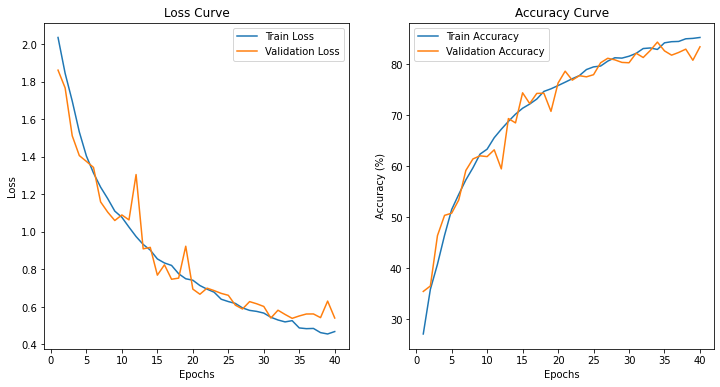

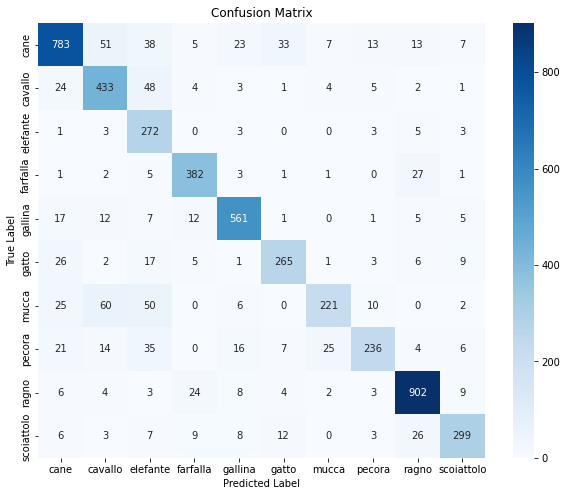

Precision: 0.8419, Recall: 0.8304, F1 Score: 0.8304
Test Accuracy: 83.04%


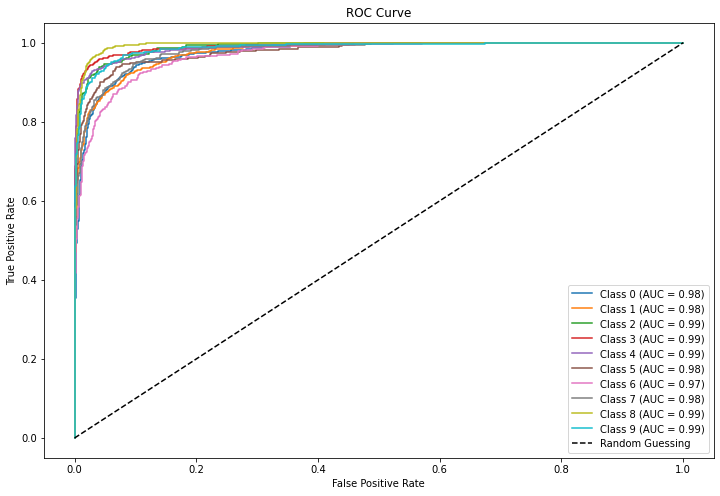

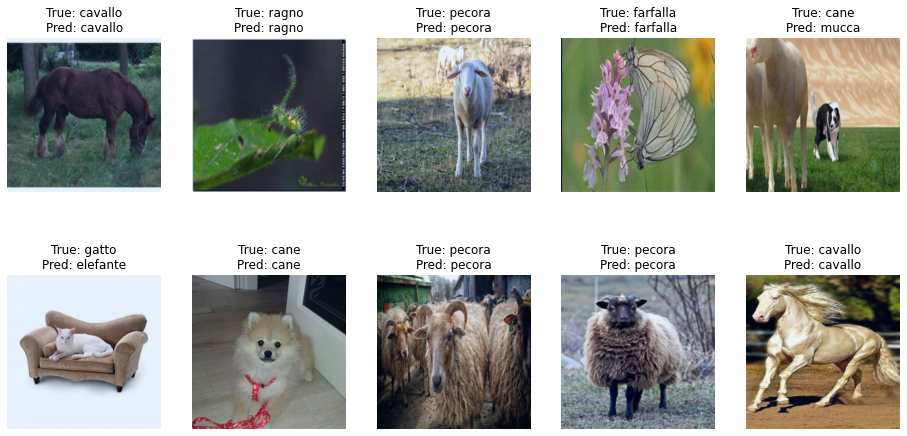

In [51]:
model = loaded_model
# Initialize lists for storing training and validation metrics
train_losses = [
    2.0358, 1.8447, 1.6973, 1.5324, 1.4040, 1.3136, 1.2383, 1.1773, 1.1106, 1.0776,
    1.0253, 0.9751, 0.9331, 0.9029, 0.8559, 0.8343, 0.8213, 0.7769, 0.7502, 0.7424,
    0.7140, 0.6948, 0.6787, 0.6411, 0.6287, 0.6186, 0.5949, 0.5817, 0.5763, 0.5673,
    0.5451, 0.5306, 0.5203, 0.5269, 0.4882, 0.4843, 0.4855, 0.4632, 0.4560, 0.4689
]

val_losses = [
    1.8617, 1.7670, 1.5121, 1.4064, 1.3755, 1.3434, 1.1597, 1.1052, 1.0605, 1.0902,
    1.0639, 1.3054, 0.9095, 0.9174, 0.7694, 0.8245, 0.7476, 0.7536, 0.9235, 0.6951,
    0.6677, 0.7002, 0.6871, 0.6723, 0.6620, 0.6094, 0.5891, 0.6284, 0.6169, 0.6026,
    0.5410, 0.5826, 0.5601, 0.5393, 0.5520, 0.5624, 0.5627, 0.5431, 0.6312, 0.5410
]

train_accuracies = [
    27.16, 35.91, 40.83, 46.51, 51.55, 54.53, 57.37, 59.74, 62.42, 63.40, 65.64, 67.31,
    68.84, 70.26, 71.42, 72.24, 73.22, 74.72, 75.23, 75.87, 76.53, 77.21, 77.82, 79.01,
    79.53, 79.70, 80.66, 81.32, 81.25, 81.62, 82.18, 83.13, 83.24, 82.95, 84.25, 84.47,
    84.52, 85.04, 85.12, 85.30
]

val_accuracies = [
    35.50, 36.57, 46.44, 50.42, 50.84, 53.44, 59.22, 61.48, 62.09, 61.94, 63.27, 59.53,
    69.40, 68.55, 74.45, 72.34, 74.33, 74.37, 70.81, 76.36, 78.69, 76.93, 77.81, 77.58,
    78.00, 80.34, 81.22, 80.91, 80.41, 80.34, 82.21, 81.37, 82.75, 84.39, 82.67, 81.83,
    82.36, 83.01, 80.83, 83.47
]



class_names = class_labels

# Test DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Call the functions
evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies)
evaluate_on_test_data(model, test_loader)
visualize_predictions(model, test_loader)

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the optimized CNN model with overfitting prevention
class OptimizedCNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(OptimizedCNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(16)  # Batch Normalization
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.dropout1 = nn.Dropout(0.25)  # Dropout layer

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(32)  # Batch Normalization
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.dropout2 = nn.Dropout(0.25)  # Dropout layer

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(64)  # Batch Normalization
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        self.dropout3 = nn.Dropout(0.25)  # Dropout layer

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.bn4 = nn.BatchNorm2d(128)  # Batch Normalization
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)
        self.dropout4 = nn.Dropout(0.25)  # Dropout layer

        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc1 = nn.Linear(128, 256)
        self.dropout_fc = nn.Dropout(0.5)  # Dropout for fully connected layer
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool1(x)
        x = self.dropout1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.maxpool2(x)
        x = self.dropout2(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.maxpool3(x)
        x = self.dropout3(x)

        x = F.relu(self.bn4(self.conv4(x)))
        x = self.maxpool4(x)
        x = self.dropout4(x)

        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)  # Dropout in the fully connected layer
        x = self.fc2(x)
        return x

# Instantiate the optimized model with overfitting prevention
optimized_model = OptimizedCNNModel(num_classes=10)

# Print the optimized model
print(optimized_model)

# Calculate total trainable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(optimized_model)
print(f"Total Parameters: {total_params}")


OptimizedCNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.25, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout3): Dropout(p=0.25, inplace=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, trac

In [45]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader


torch.cuda.empty_cache()
# del model

model = OptimizedCNNModel(num_classes=10)
# Hyperparameters
learning_rate = 0.002
batch_size = 64
epochs = 25
num_classes = 10  # Number of classes in your dataset

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)

# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model = model.to(device)

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Using device: cuda
Epoch [1/25], Loss: 1.9568, Accuracy: 30.32%
Validation Loss: 1.8173, Validation Accuracy: 35.50%
Epoch [2/25], Loss: 1.7565, Accuracy: 38.57%
Validation Loss: 1.9759, Validation Accuracy: 31.18%
Epoch [3/25], Loss: 1.6277, Accuracy: 42.75%
Validation Loss: 1.4380, Validation Accuracy: 48.28%
Epoch [4/25], Loss: 1.5458, Accuracy: 45.99%
Validation Loss: 2.1781, Validation Accuracy: 27.16%
Epoch [5/25], Loss: 1.4719, Accuracy: 49.14%
Validation Loss: 1.6266, Validation Accuracy: 41.58%
Epoch [6/25], Loss: 1.4162, Accuracy: 50.90%
Validation Loss: 1.9333, Validation Accuracy: 35.12%
Epoch [7/25], Loss: 1.3717, Accuracy: 52.16%
Validation Loss: 1.4703, Validation Accuracy: 51.68%
Epoch [8/25], Loss: 1.3396, Accuracy: 53.23%
Validation Loss: 1.4639, Validation Accuracy: 45.72%
Epoch [9/25], Loss: 1.2924, Accuracy: 54.82%
Validation Loss: 1.5667, Validation Accuracy: 46.56%
Epoch [10/25], Loss: 1.2701, Accuracy: 55.76%
Validation Loss: 1.6902, Validation Accuracy: 43.57%


In [46]:
# Additional training for 35 more epochs
# Adjust the starting epoch and total number of epochs accordingly
additional_epochs = 35
start_epoch = epochs  # Starting epoch based on the previous training
total_epochs = start_epoch + additional_epochs

for epoch in range(start_epoch, total_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{total_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Epoch [26/60], Loss: 0.9991, Accuracy: 65.92%
Validation Loss: 1.6387, Validation Accuracy: 49.16%
Epoch [27/60], Loss: 0.9927, Accuracy: 66.42%
Validation Loss: 1.5637, Validation Accuracy: 51.30%
Epoch [28/60], Loss: 0.9844, Accuracy: 66.73%
Validation Loss: 1.2914, Validation Accuracy: 56.35%
Epoch [29/60], Loss: 0.9785, Accuracy: 66.89%
Validation Loss: 1.3355, Validation Accuracy: 55.47%
Epoch [30/60], Loss: 0.9626, Accuracy: 67.12%
Validation Loss: 1.1356, Validation Accuracy: 61.40%
Epoch [31/60], Loss: 0.9668, Accuracy: 67.24%
Validation Loss: 1.0122, Validation Accuracy: 64.77%
Epoch [32/60], Loss: 0.9542, Accuracy: 67.72%
Validation Loss: 0.9991, Validation Accuracy: 66.34%
Epoch [33/60], Loss: 0.9408, Accuracy: 67.92%
Validation Loss: 1.2630, Validation Accuracy: 57.46%
Epoch [34/60], Loss: 0.9416, Accuracy: 68.17%
Validation Loss: 1.2473, Validation Accuracy: 59.10%
Epoch [35/60], Loss: 0.9260, Accuracy: 68.73%
Validation Loss: 1.2188, Validation Accuracy: 59.30%
Epoch [36/

Old

In [17]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader

# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 20
num_classes = 10  # Number of classes in your dataset

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model = model.to(device)

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Using device: cuda
Epoch [1/20], Loss: 1.9147, Accuracy: 32.06%
Validation Loss: 1.8869, Validation Accuracy: 34.28%
Epoch [2/20], Loss: 1.6626, Accuracy: 41.58%
Validation Loss: 1.4819, Validation Accuracy: 47.51%
Epoch [3/20], Loss: 1.4988, Accuracy: 46.98%
Validation Loss: 1.3897, Validation Accuracy: 50.99%
Epoch [4/20], Loss: 1.4003, Accuracy: 51.25%
Validation Loss: 1.3474, Validation Accuracy: 54.90%
Epoch [5/20], Loss: 1.3137, Accuracy: 54.32%
Validation Loss: 1.1819, Validation Accuracy: 58.72%
Epoch [6/20], Loss: 1.2603, Accuracy: 56.24%
Validation Loss: 1.2745, Validation Accuracy: 55.05%
Epoch [7/20], Loss: 1.1901, Accuracy: 58.87%
Validation Loss: 1.0825, Validation Accuracy: 62.01%
Epoch [8/20], Loss: 1.1545, Accuracy: 60.16%
Validation Loss: 1.0953, Validation Accuracy: 61.36%
Epoch [9/20], Loss: 1.1056, Accuracy: 61.75%
Validation Loss: 0.9714, Validation Accuracy: 66.22%
Epoch [10/20], Loss: 1.0808, Accuracy: 62.97%
Validation Loss: 1.1175, Validation Accuracy: 60.83%


In [18]:
# Additional epochs
additional_epochs = 10

# Filepath to save the new model
model_save_path = "trained_model_additional_epochs.pth"

# Continue training loop
for epoch in range(epochs, epochs + additional_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs + additional_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Save the model
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Epoch [21/30], Loss: 0.8132, Accuracy: 72.93%
Validation Loss: 1.0016, Validation Accuracy: 67.10%
Epoch [22/30], Loss: 0.7904, Accuracy: 73.73%
Validation Loss: 0.8147, Validation Accuracy: 71.96%
Epoch [23/30], Loss: 0.7765, Accuracy: 74.35%
Validation Loss: 0.7524, Validation Accuracy: 74.94%
Epoch [24/30], Loss: 0.7433, Accuracy: 75.21%
Validation Loss: 0.8835, Validation Accuracy: 69.78%
Epoch [25/30], Loss: 0.7433, Accuracy: 75.07%
Validation Loss: 0.6824, Validation Accuracy: 77.05%
Epoch [26/30], Loss: 0.7155, Accuracy: 76.37%
Validation Loss: 0.7125, Validation Accuracy: 75.48%
Epoch [27/30], Loss: 0.6856, Accuracy: 77.29%
Validation Loss: 0.6861, Validation Accuracy: 77.47%
Epoch [28/30], Loss: 0.6896, Accuracy: 77.05%
Validation Loss: 0.7464, Validation Accuracy: 76.47%
Epoch [29/30], Loss: 0.6698, Accuracy: 77.66%
Validation Loss: 0.7238, Validation Accuracy: 75.36%
Epoch [30/30], Loss: 0.6446, Accuracy: 78.55%
Validation Loss: 0.7153, Validation Accuracy: 77.85%
Model save

In [19]:
# Further additional epochs
additional_epochs = 10

# Filepath to save the updated model after more training
model_save_path = "trained_model_further_epochs.pth"

# Continue training loop
for epoch in range(epochs + additional_epochs, epochs + 2 * additional_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs + 2 * additional_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Save the model
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Epoch [31/40], Loss: 0.6299, Accuracy: 79.08%
Validation Loss: 0.5839, Validation Accuracy: 80.37%
Epoch [32/40], Loss: 0.6264, Accuracy: 79.19%
Validation Loss: 0.6238, Validation Accuracy: 79.57%
Epoch [33/40], Loss: 0.6038, Accuracy: 79.89%
Validation Loss: 0.6163, Validation Accuracy: 79.19%
Epoch [34/40], Loss: 0.5998, Accuracy: 80.06%
Validation Loss: 0.6431, Validation Accuracy: 78.84%
Epoch [35/40], Loss: 0.5870, Accuracy: 80.42%
Validation Loss: 0.6550, Validation Accuracy: 78.00%
Epoch [36/40], Loss: 0.5705, Accuracy: 81.19%
Validation Loss: 0.6589, Validation Accuracy: 77.85%
Epoch [37/40], Loss: 0.5699, Accuracy: 81.18%
Validation Loss: 0.5883, Validation Accuracy: 80.18%
Epoch [38/40], Loss: 0.5492, Accuracy: 81.97%
Validation Loss: 0.5783, Validation Accuracy: 82.10%
Epoch [39/40], Loss: 0.5411, Accuracy: 82.17%
Validation Loss: 0.5140, Validation Accuracy: 83.05%
Epoch [40/40], Loss: 0.5343, Accuracy: 82.51%
Validation Loss: 0.6051, Validation Accuracy: 81.10%
Model save

In [20]:
# Continue for 10 more epochs
additional_epochs = 10

# Filepath to save the updated model after 10 more epochs
model_save_path = "trained_model_10_more_epochs.pth"

# Continue training loop
for epoch in range(epochs + additional_epochs, epochs + 2 * additional_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs + 2 * additional_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Save the model
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Epoch [31/40], Loss: 0.5211, Accuracy: 83.03%
Validation Loss: 0.6138, Validation Accuracy: 80.49%
Epoch [32/40], Loss: 0.5140, Accuracy: 83.05%
Validation Loss: 0.6768, Validation Accuracy: 77.62%
Epoch [33/40], Loss: 0.5002, Accuracy: 83.54%
Validation Loss: 0.5434, Validation Accuracy: 83.78%
Epoch [34/40], Loss: 0.4857, Accuracy: 83.51%
Validation Loss: 0.5573, Validation Accuracy: 82.56%
Epoch [35/40], Loss: 0.4819, Accuracy: 83.94%
Validation Loss: 0.4993, Validation Accuracy: 83.82%
Epoch [36/40], Loss: 0.4714, Accuracy: 84.66%
Validation Loss: 0.5634, Validation Accuracy: 82.63%
Epoch [37/40], Loss: 0.4648, Accuracy: 84.61%
Validation Loss: 0.6082, Validation Accuracy: 81.25%
Epoch [38/40], Loss: 0.4581, Accuracy: 84.88%
Validation Loss: 0.6435, Validation Accuracy: 80.07%
Epoch [39/40], Loss: 0.4485, Accuracy: 85.11%
Validation Loss: 0.5640, Validation Accuracy: 82.06%
Epoch [40/40], Loss: 0.4353, Accuracy: 85.61%
Validation Loss: 0.4852, Validation Accuracy: 84.66%
Model save

In [27]:


# Load the saved model's state dictionary
model.load_state_dict(torch.load("trained_model_10_more_epochs.pth"))

# Move model to the appropriate device (CPU or GPU)
model.to(device)

# Set the model to evaluation mode if you're using it for inference
model.eval()

print("Model loaded successfully!")

Model loaded successfully!


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7352\3796426575.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("trained_model_10_more_epochs

In [28]:
# Continue for 10 more epochs
additional_epochs = 10

# Filepath to save the updated model after 10 more epochs
model_save_path = "trained_model_60_epochs.pth"
epochs = 40
# Continue training loop
for epoch in range(epochs + additional_epochs, epochs + 2 * additional_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs + 2 * additional_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Save the model
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Epoch [51/60], Loss: 0.4284, Accuracy: 85.63%
Validation Loss: 0.6007, Validation Accuracy: 81.52%
Epoch [52/60], Loss: 0.4305, Accuracy: 85.69%
Validation Loss: 0.4983, Validation Accuracy: 83.47%
Epoch [53/60], Loss: 0.4142, Accuracy: 86.07%
Validation Loss: 0.5605, Validation Accuracy: 82.90%
Epoch [54/60], Loss: 0.4215, Accuracy: 85.84%
Validation Loss: 0.5407, Validation Accuracy: 82.82%
Epoch [55/60], Loss: 0.4065, Accuracy: 86.74%
Validation Loss: 0.6206, Validation Accuracy: 80.99%
Epoch [56/60], Loss: 0.4126, Accuracy: 86.46%
Validation Loss: 0.4778, Validation Accuracy: 84.77%
Epoch [57/60], Loss: 0.3896, Accuracy: 87.26%
Validation Loss: 0.4869, Validation Accuracy: 85.04%
Epoch [58/60], Loss: 0.3812, Accuracy: 87.21%
Validation Loss: 0.5181, Validation Accuracy: 83.89%
Epoch [59/60], Loss: 0.3721, Accuracy: 87.45%
Validation Loss: 0.5158, Validation Accuracy: 83.86%
Epoch [60/60], Loss: 0.3703, Accuracy: 87.87%
Validation Loss: 0.4867, Validation Accuracy: 84.89%
Model save

In [61]:


# Load the saved model's state dictionary
model.load_state_dict(torch.load("trained_model_60_epochs.pth", weights_only=True))


# Move model to the appropriate device (CPU or GPU)
model.to(device)

# Set the model to evaluation mode if you're using it for inference
model.eval()

print("Model loaded successfully!")

RuntimeError: Error(s) in loading state_dict for CNNModel:
	Missing key(s) in state_dict: "batchnorm1.weight", "batchnorm1.bias", "batchnorm1.running_mean", "batchnorm1.running_var", "batchnorm2.weight", "batchnorm2.bias", "batchnorm2.running_mean", "batchnorm2.running_var", "batchnorm3.weight", "batchnorm3.bias", "batchnorm3.running_mean", "batchnorm3.running_var", "batchnorm4.weight", "batchnorm4.bias", "batchnorm4.running_mean", "batchnorm4.running_var". 
	Unexpected key(s) in state_dict: "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "bn1.num_batches_tracked", "bn2.weight", "bn2.bias", "bn2.running_mean", "bn2.running_var", "bn2.num_batches_tracked", "bn3.weight", "bn3.bias", "bn3.running_mean", "bn3.running_var", "bn3.num_batches_tracked", "bn4.weight", "bn4.bias", "bn4.running_mean", "bn4.running_var", "bn4.num_batches_tracked". 

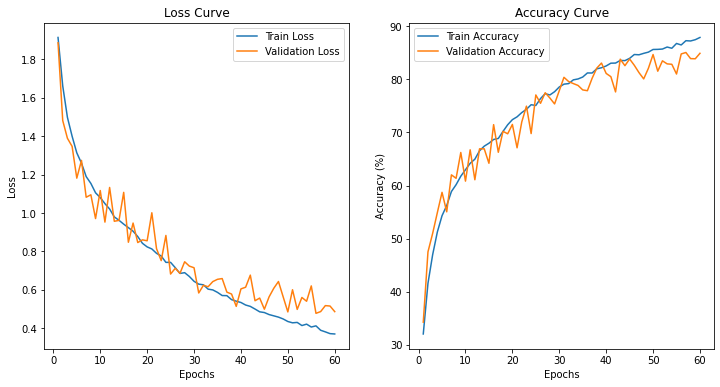

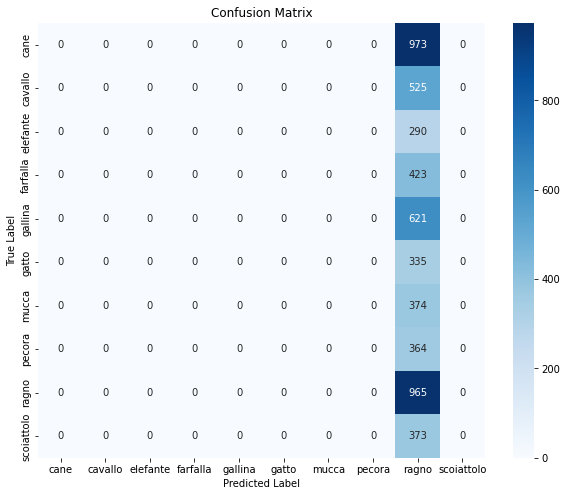

Precision: 0.0339, Recall: 0.1841, F1 Score: 0.0572
Test Accuracy: 18.41%


C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


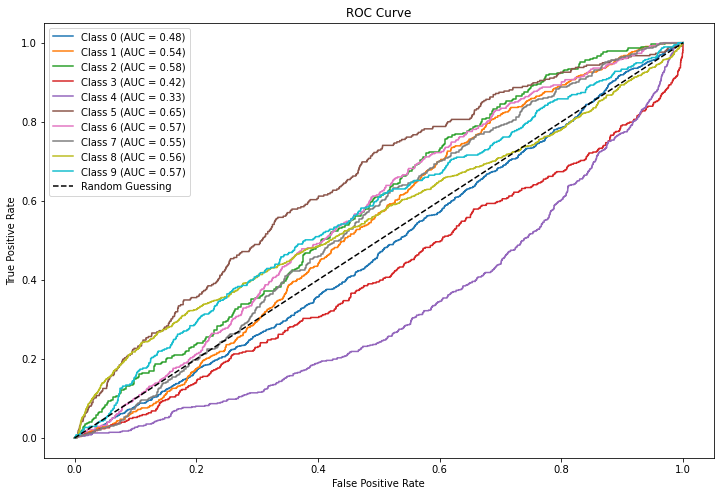

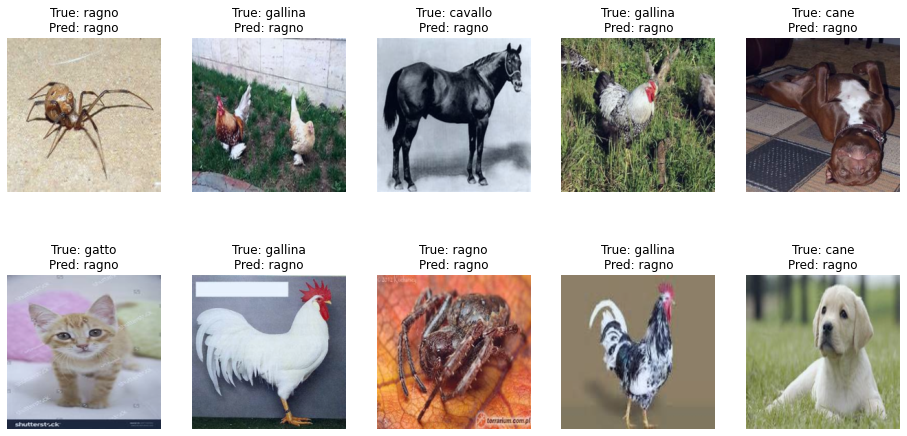

In [60]:
model = loaded_model
# Initialize lists for storing training and validation metrics
train_losses = [
    1.9147, 1.6626, 1.4988, 1.4003, 1.3137, 1.2603, 1.1901, 1.1545, 1.1056, 1.0808,
    1.0492, 1.0213, 0.9801, 0.9624, 0.9424, 0.9242, 0.9057, 0.8777, 0.8425, 0.8239,
    0.8132, 0.7904, 0.7765, 0.7433, 0.7433, 0.7155, 0.6856, 0.6896, 0.6698, 0.6446,
    0.6299, 0.6264, 0.6038, 0.5998, 0.5870, 0.5705, 0.5699, 0.5492, 0.5411, 0.5343,
    0.5211, 0.5140, 0.5002, 0.4857, 0.4819, 0.4714, 0.4648, 0.4581, 0.4485, 0.4353,
    0.4284, 0.4305, 0.4142, 0.4215, 0.4065, 0.4126, 0.3896, 0.3812, 0.3721, 0.3703
]

val_losses = [
    1.8869, 1.4819, 1.3897, 1.3474, 1.1819, 1.2745, 1.0825, 1.0953, 0.9714, 1.1175,
    0.9530, 1.1334, 0.9573, 0.9620, 1.1079, 0.8481, 0.9480, 0.8465, 0.8607, 0.8557,
    1.0016, 0.8147, 0.7524, 0.8835, 0.6824, 0.7125, 0.6861, 0.7464, 0.7238, 0.7153,
    0.5839, 0.6238, 0.6163, 0.6431, 0.6550, 0.6589, 0.5883, 0.5783, 0.5140, 0.6051,
    0.6138, 0.6768, 0.5434, 0.5573, 0.4993, 0.5634, 0.6082, 0.6435, 0.5640, 0.4852,
    0.6007, 0.4983, 0.5605, 0.5407, 0.6206, 0.4778, 0.4869, 0.5181, 0.5158, 0.4867
]

train_accuracies = [
    32.06, 41.58, 46.98, 51.25, 54.32, 56.24, 58.87, 60.16, 61.75, 62.97,
    64.18, 64.96, 66.54, 67.41, 67.96, 68.67, 68.86, 70.18, 71.44, 72.40,
    72.93, 73.73, 74.35, 75.21, 75.07, 76.37, 77.29, 77.05, 77.66, 78.55,
    79.08, 79.19, 79.89, 80.06, 80.42, 81.19, 81.18, 81.97, 82.17, 82.51,
    83.03, 83.05, 83.54, 83.51, 83.94, 84.66, 84.61, 84.88, 85.11, 85.61,
    85.63, 85.69, 86.07, 85.84, 86.74, 86.46, 87.26, 87.21, 87.45, 87.87
]

val_accuracies = [
    34.28, 47.51, 50.99, 54.90, 58.72, 55.05, 62.01, 61.36, 66.22, 60.83,
    66.72, 61.09, 66.91, 66.91, 64.19, 71.46, 66.26, 70.20, 69.74, 71.50,
    67.10, 71.96, 74.94, 69.78, 77.05, 75.48, 77.47, 76.47, 75.36, 77.85,
    80.37, 79.57, 79.19, 78.84, 78.00, 77.85, 80.18, 82.10, 83.05, 81.10,
    80.49, 77.62, 83.78, 82.56, 83.82, 82.63, 81.25, 80.07, 82.06, 84.66,
    81.52, 83.47, 82.90, 82.82, 80.99, 84.77, 85.04, 83.89, 83.86, 84.89
]



class_names = class_labels

# Test DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Call the functions
evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies)
evaluate_on_test_data(model, test_loader)
visualize_predictions(model, test_loader)

In [34]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader


# Instantiate the model
model2 = CNNModel(num_classes=10)

# Define the optimizer and loss function
optimizer = optim.Adam(model2.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Print model summary (similar to Keras model summary)
print(model2)

# Print model summary and check parameters
def count_parameters(model2):
    return sum(p.numel() for p in model2.parameters() if p.requires_grad)

total_params = count_parameters(model2)
print(f"Total Parameters: {total_params}")
# Hyperparameters
learning_rate = 0.005
batch_size = 32
epochs = 20
num_classes = 10  # Number of classes in your dataset

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model2 = model2.to(device)

# Training loop
for epoch in range(epochs):
    model2.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model2(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model2.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model2(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveA

In [36]:
model_save_path = "model2.pth"
torch.save(model2.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to model2.pth


In [37]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader


# Instantiate the model
model3 = CNNModel(num_classes=10)

# Define the optimizer and loss function
optimizer = optim.Adam(model3.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Print model summary (similar to Keras model summary)
print(model3)

# Print model summary and check parameters
def count_parameters(model3):
    return sum(p.numel() for p in model3.parameters() if p.requires_grad)

total_params = count_parameters(model3)
print(f"Total Parameters: {total_params}")
# Hyperparameters
learning_rate = 0.01
batch_size = 64
epochs = 20
num_classes = 10  # Number of classes in your dataset

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model3 = model3.to(device)

# Training loop
for epoch in range(epochs):
    model3.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model3(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model3.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model3(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")
model_save_path = "model3.pth"
torch.save(model3.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveA

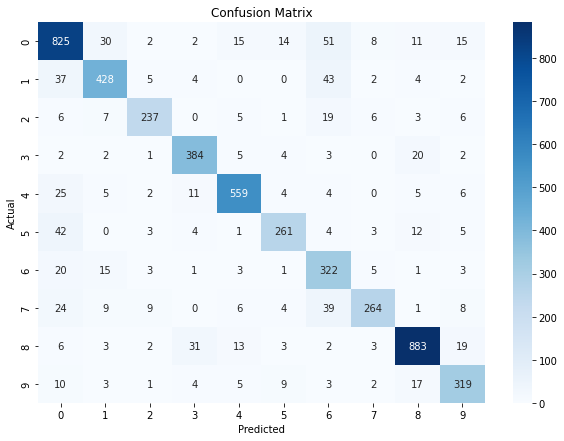

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.83      0.85      0.84       973
     Class 1       0.85      0.82      0.83       525
     Class 2       0.89      0.82      0.85       290
     Class 3       0.87      0.91      0.89       423
     Class 4       0.91      0.90      0.91       621
     Class 5       0.87      0.78      0.82       335
     Class 6       0.66      0.86      0.75       374
     Class 7       0.90      0.73      0.80       364
     Class 8       0.92      0.92      0.92       965
     Class 9       0.83      0.86      0.84       373

    accuracy                           0.85      5243
   macro avg       0.85      0.84      0.85      5243
weighted avg       0.86      0.85      0.86      5243



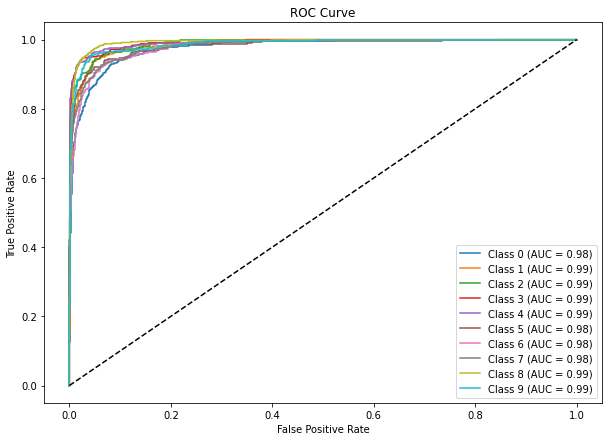

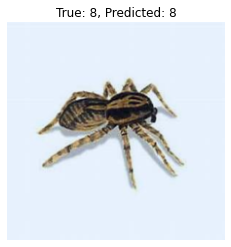

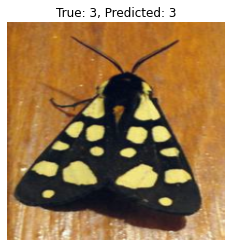

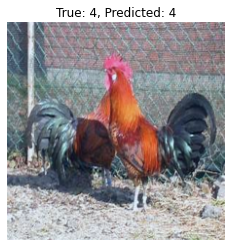

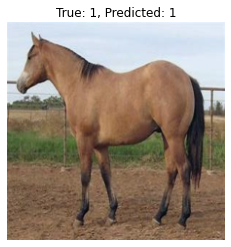

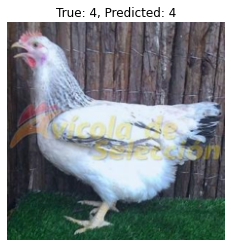

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import torch.nn.functional as F
import numpy as np
import random

# Function to calculate metrics and visualize results
def analyze_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode

    all_labels = []
    all_predictions = []
    all_probabilities = []

    # Iterate over test data
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probabilities = F.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

    # Convert lists to numpy arrays
    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions)
    all_probabilities = np.array(all_probabilities)

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    report = classification_report(all_labels, all_predictions, target_names=[f'Class {i}' for i in range(10)])
    print("Classification Report:\n", report)

    # ROC Curve and AUC
    plt.figure(figsize=(10, 7))
    for i in range(10):  # Assuming 10 classes
        fpr, tpr, _ = roc_curve(all_labels == i, all_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Visualize some test images with true and predicted labels
def visualize_predictions(model, test_loader, device, num_images=5):
    model.eval()
    all_images = []
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs, 1)

            all_images.extend(images.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Combine all and randomize
    combined = list(zip(all_images, all_labels, all_predictions))
    random.shuffle(combined)

    # Display random images
    for i, (img, true_label, pred_label) in enumerate(combined[:num_images]):
        img = np.transpose(img, (1, 2, 0))  # Convert to HWC format
        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1] for correct display

        plt.figure()
        plt.imshow(img)
        plt.title(f'True: {true_label}, Predicted: {pred_label}')
        plt.axis('off')
        plt.show()


analyze_model(model, test_loader, device)
visualize_predictions(model, test_loader, device)


phase 2

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define the modified CNN model
class CNNModelModified(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModelModified, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)  # Reduced filters
        self.bn1 = nn.BatchNorm2d(16)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)  # Reduced filters
        self.bn2 = nn.BatchNorm2d(32)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)  # Reduced filters
        self.bn3 = nn.BatchNorm2d(64)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)  # Reduced filters
        self.bn4 = nn.BatchNorm2d(128)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)

        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc1 = nn.Linear(128, 256)  # Reduced units
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)  # Reduced units

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.maxpool2(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.maxpool3(x)

        x = F.relu(self.bn4(self.conv4(x)))
        x = self.maxpool4(x)

        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the modified model
model_mod = CNNModelModified(num_classes=10)

# Define the optimizer and loss function
optimizer = optim.Adam(model_mod.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Print model_mod summary and check parameters
def count_parameters(model_mod):
    return sum(p.numel() for p in model_mod.parameters() if p.requires_grad)

total_params = count_parameters(model_mod)
print(model_mod)
print(f"Total Parameters: {total_params}")


CNNModelModified(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): Adap

In [41]:
# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 60
num_classes = 10  # Number of classes in your dataset

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mod.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model_mod = model_mod.to(device)

# Training loop
for epoch in range(epochs):
    model_mod.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model_mod(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model_mod.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model_mod(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Using device: cuda
Epoch [1/60], Loss: 1.9084, Accuracy: 33.06%
Validation Loss: 1.6774, Validation Accuracy: 38.98%
Epoch [2/60], Loss: 1.6275, Accuracy: 42.72%
Validation Loss: 1.5847, Validation Accuracy: 43.11%
Epoch [3/60], Loss: 1.4795, Accuracy: 48.30%
Validation Loss: 1.3744, Validation Accuracy: 51.87%
Epoch [4/60], Loss: 1.4034, Accuracy: 50.93%
Validation Loss: 1.3907, Validation Accuracy: 50.57%
Epoch [5/60], Loss: 1.3319, Accuracy: 53.65%
Validation Loss: 1.2980, Validation Accuracy: 52.83%
Epoch [6/60], Loss: 1.2853, Accuracy: 55.45%
Validation Loss: 1.3815, Validation Accuracy: 52.37%
Epoch [7/60], Loss: 1.2300, Accuracy: 57.17%
Validation Loss: 1.1531, Validation Accuracy: 58.84%
Epoch [8/60], Loss: 1.2033, Accuracy: 58.47%
Validation Loss: 1.1509, Validation Accuracy: 58.68%
Epoch [9/60], Loss: 1.1681, Accuracy: 59.56%
Validation Loss: 1.2036, Validation Accuracy: 58.95%
Epoch [10/60], Loss: 1.1452, Accuracy: 60.36%
Validation Loss: 1.1081, Validation Accuracy: 60.18%


In [42]:
model_save_path = "model_pahse2.pth"
torch.save(model_mod.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to model_pahse2.pth


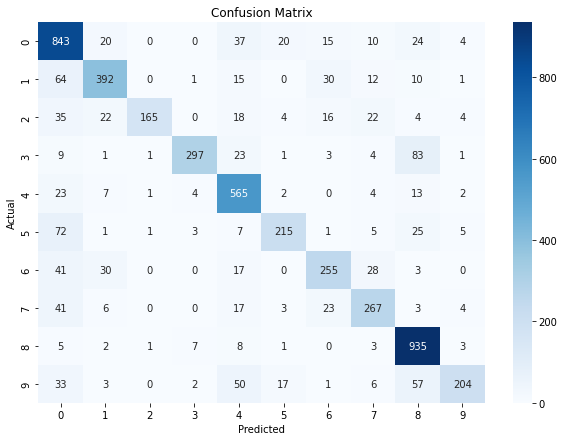

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.72      0.87      0.79       973
     Class 1       0.81      0.75      0.78       525
     Class 2       0.98      0.57      0.72       290
     Class 3       0.95      0.70      0.81       423
     Class 4       0.75      0.91      0.82       621
     Class 5       0.82      0.64      0.72       335
     Class 6       0.74      0.68      0.71       374
     Class 7       0.74      0.73      0.74       364
     Class 8       0.81      0.97      0.88       965
     Class 9       0.89      0.55      0.68       373

    accuracy                           0.79      5243
   macro avg       0.82      0.74      0.76      5243
weighted avg       0.80      0.79      0.78      5243



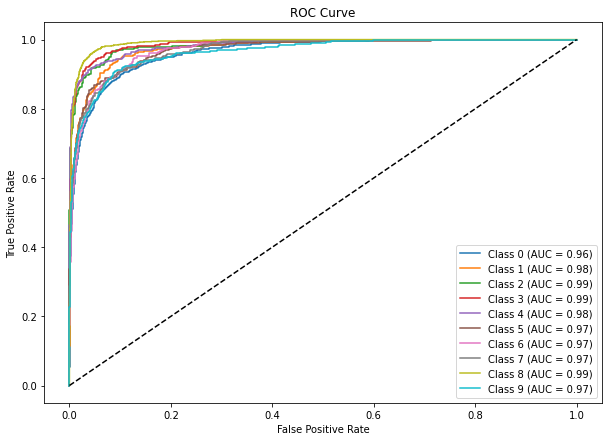

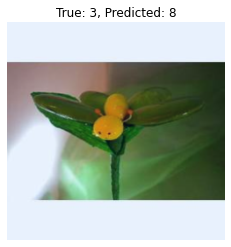

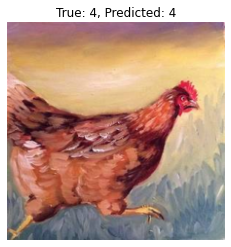

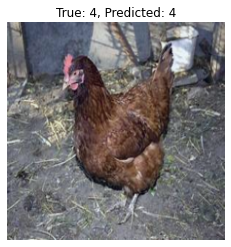

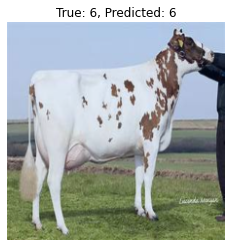

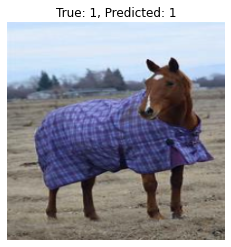

In [45]:
analyze_model(model_mod, test_loader, device)
visualize_predictions(model_mod, test_loader, device)